In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

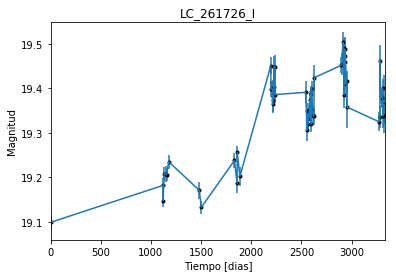

In [2]:
data = np.genfromtxt('LC_261726_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_261726_I')
plt.savefig("LC_261726_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

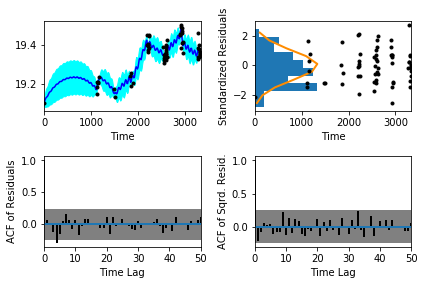

In [5]:
sample.assess_fit()

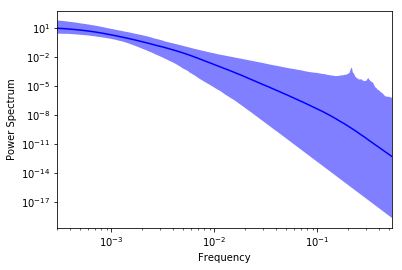

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [26]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

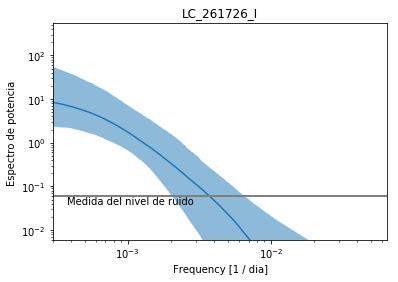

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_261726_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_261726_I')

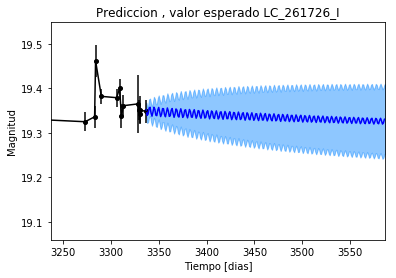

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_261726_I')

Text(0.5,1,'Prediccion, Caminos simulados_LC_261726_I')

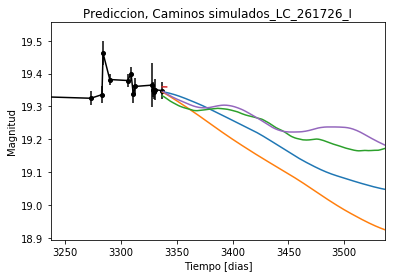

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_261726_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


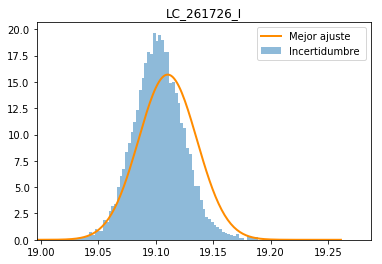

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_261726_I')
plt.savefig("Mejor_ajuste_LC_261726_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_261726_I')

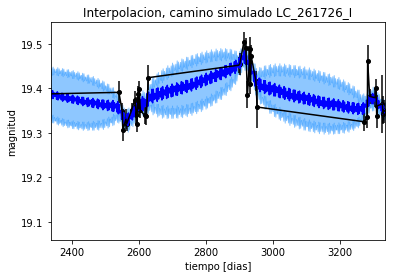

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_261726_I')

Text(0.5,1,'Interpolacion, camino simulado LC_261726_I')

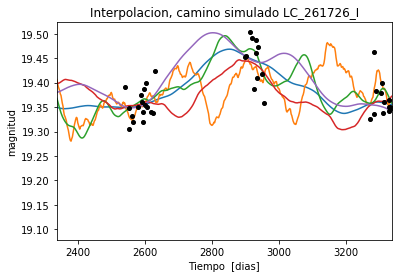

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_261726_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 299.105988331
Median: 0.00967251706732
Standard deviation: 0.223874275291
68% credibility interval: [ 0.00090544  0.22730283]
95% credibility interval: [  3.57663208e-04   8.72696523e-01]
99% credibility interval: [  3.10204148e-04   1.03392861e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 593.800168411
Median: 0.00153263562051
Standard deviation: 0.0708888947022
68% credibility interval: [ 0.00044776  0.01885336]
95% credibility interval: [ 0.00031609  0.17507174]
99% credibility interval: [  3.04595274e-04   5.09215695e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 617.886248628
Median: 0.0198906851448
Standard

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 476.838742113
Median: 139.491236184
Standard deviation: 1.70976258731
68% credibility interval: [ 137.77781027  140.7180292 ]
95% credibility interval: [ 135.39417189  142.68957357]
99% credibility interval: [ 133.55742327  144.29318342]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 345.042578128
Median: 0.574249352574
Standard deviation: 2.17742907292
68% credibility interval: [ 0.05406099  3.77108164]
95% credibility interval: [ 0.01445505  7.34291262]
99% credibility interval: [  9.79933823e-03   1.02232966e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 345.240558562
Median: 0.489230032873
Standard deviation: 8.37204671354
68% credibility interval: [ 0.01317907  6.26259832]
95% credibility interval: [  6.6

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 2463.77127202
Median: 1.69302655064e-34
Standard deviation: 1.70739546263e+78
68% credibility interval: [  5.01180064e-57   6.61755754e-12]
95% credibility interval: [  8.05866791e-84   7.26151887e+00]
99% credibility interval: [  1.52171857e-100   4.05414077e+065]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3747.21128699
Median: 19.2594038382
Standard deviation: 0.0747013514159
68% credibility interval: [ 19.19354185  19.31844507]
95% credibility interval: [ 19.10252064  19.39705757]
99% credibility interval: [ 19.01374551  19.48996018]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 304.908084392
Median: 0.00261427456067
Standard deviation: 0.229599733643
68% credibility interval: [ 0.          0.30975378]
95% credibility interval: [ 0.          0.84973431]
99% credibility interval: [ 0.         1.0124524]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 304.908084392
Median: 0.00261427456067
Standard deviation: 0.229599733643
68% credibility interval: [ 0.          0.30975378]
95% credibility interval: [ 0.          0.84973431]
99% credibility interval: [ 0.         1.0124524]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1766.72925819
Median: 0.0
Standard deviation: 0.000264365953224
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 476.838742113
Median: 139.491236184
Standard deviation: 1.70976258731
68% credibility interval: [ 137.77781027  140.7180292 ]
95% credibility interval: [ 135.39417189  142.68957357]
99% credibility interval: [ 133.55742327  144.29318342]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1528.1652139
Median: 0.0160152059795
Standard deviation: 0.0220856298701
68% credibility interval: [ 0.00931159  0.03289857]
95% credibility interval: [ 0.00621705  0.07673332]
99% credibility interval: [ 0.00513839  0.13527745]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 581.14215353
Median: 1.50178519214
Standard deviation: 0.224101254244
68% credibility interval: [ 1.28081051  1.73819091]
95% credibility interval: [ 1.02508146  1.92509079]
99% credibility interval: [ 0.86253299  1.9858194 ]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 479.473766337
Median: 8.98629984011e-05
Standard deviation: 0.0761805450626
68% credibility interval: [  1.16883024e-06   4.17759846e-03]
95% credibility interval: [  8.34865495e-09   7.02598151e-02]
99% credibility interval: [  1.22259773e-71   3.70228424e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 299.105988331
Median: (-0.0607742171208-0.212380348372j)
Standard deviation: 2.01489251506
68% credibility interval: [-1.42818577+0.j         -0.00568907-0.29933105j]
95% credibility interval: [ -5.48331397e+00+0.j          -2.24726421e-03-0.00347733j]
99% credibility interval: [ -6.49636505e+00+0.j          -1.94907014e-03-1.35417879j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 593.800168411
Median: (-0.00962983361207+1.22495369853j)
Standard deviation: 1.50981260152
68% credibility interval: [-0.11845915+0.j -0.00281334+0.j]
95% credibility interval: [-1.10000817+2.77984444j -0.00198604+0.j        ]
99% credibility interval: [ -3.19949657e+00+6.47852896j  -1.91382855e-03+0.j        ]
Posterior summary for parame